#import libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split


# Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

 **load data and  generate summary statistics**

In [2]:
df=pd.read_csv('/content/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [4]:
df.shape

(14684, 32)

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,14684.000000,14684.000000,14684.000000,14684.000000,14684.000000,14684.000000,14684.000000,14683.000000,14683.000000,14683.000000,14683.000000,14683.000000,14683.000000,14683.000000,12172.000000,1005.000000,14683.000000,14683.000000,14683.000000,14683.000000
mean,0.692863,117.094593,2016.023154,28.428766,15.852969,1.292291,3.409153,1.913574,0.162773,0.011169,0.000136,0.008922,0.131717,0.225703,222.486773,219.241791,1.017367,101.136610,0.054485,0.537833
std,0.461322,100.774470,0.746767,12.894383,8.953989,1.182850,2.537330,0.977172,0.507737,0.107658,0.011671,0.110673,1.079059,0.648997,82.943935,111.503739,10.283207,62.574492,0.228475,0.784059
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,34.000000,2015.000000,18.000000,8.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,135.000000,0.000000,55.000000,0.000000,0.000000
50%,1.000000,93.000000,2016.000000,29.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,81.000000,0.000000,0.000000
75%,1.000000,179.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.000000,281.000000,0.000000,135.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,3.000000,30.000000,17.000000,531.000000,543.000000,150.000000,450.000000,2.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14684 entries, 0 to 14683
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           14684 non-null  object 
 1   is_canceled                     14684 non-null  int64  
 2   lead_time                       14684 non-null  int64  
 3   arrival_date_year               14684 non-null  int64  
 4   arrival_date_month              14684 non-null  object 
 5   arrival_date_week_number        14684 non-null  int64  
 6   arrival_date_day_of_month       14684 non-null  int64  
 7   stays_in_weekend_nights         14684 non-null  int64  
 8   stays_in_week_nights            14684 non-null  int64  
 9   adults                          14683 non-null  float64
 10  children                        14683 non-null  float64
 11  babies                          14683 non-null  float64
 12  meal                            

**check duplicated value**

In [7]:
df.duplicated().sum()

np.int64(3216)

**check null value**

In [9]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,1


In [11]:
print(df.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                1
children                              1
babies                                1
meal                                  1
country                             432
market_segment                        1
distribution_channel                  1
is_repeated_guest                     1
previous_cancellations                1
previous_bookings_not_canceled        1
reserved_room_type                    1
assigned_room_type                    1
booking_changes                       1
deposit_type                          1
agent                              1782
company                           10645


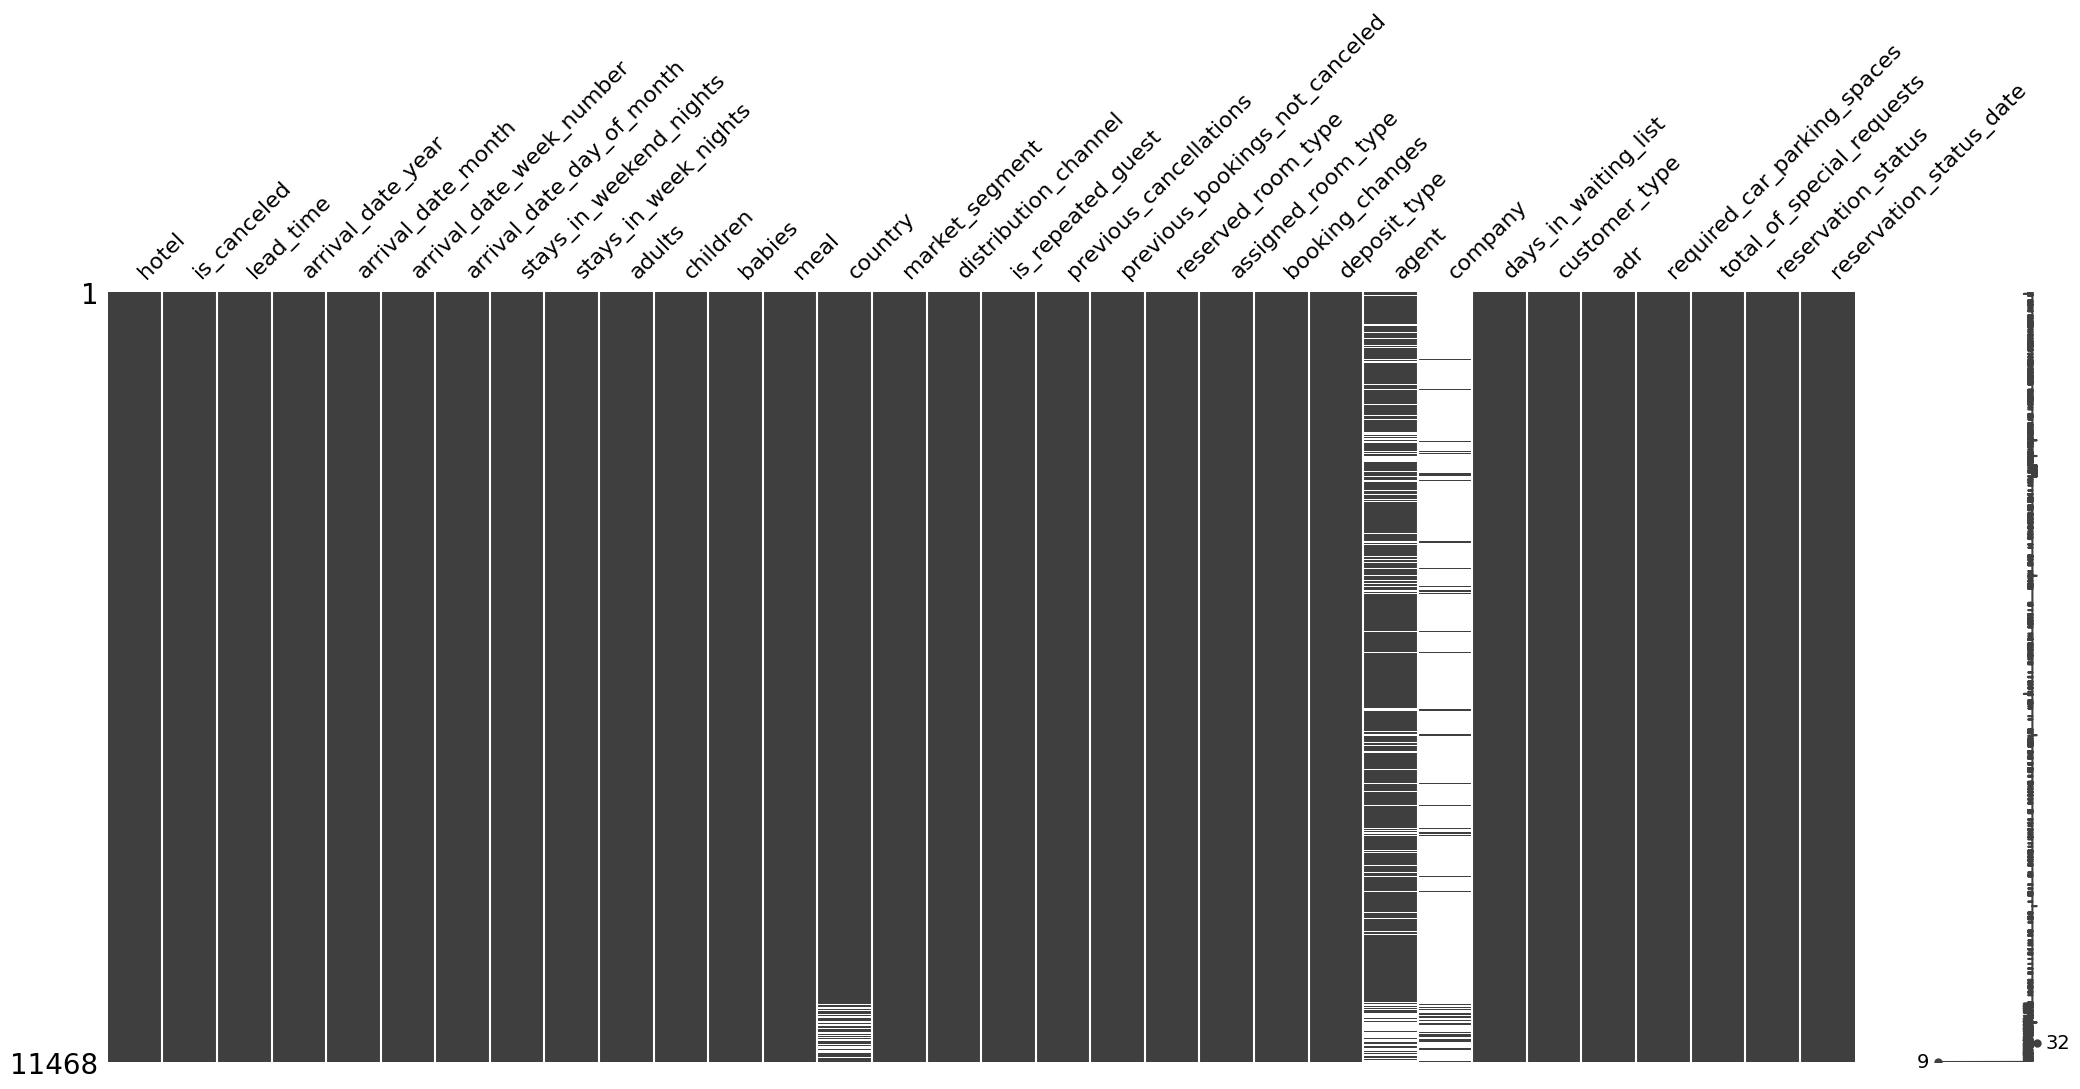

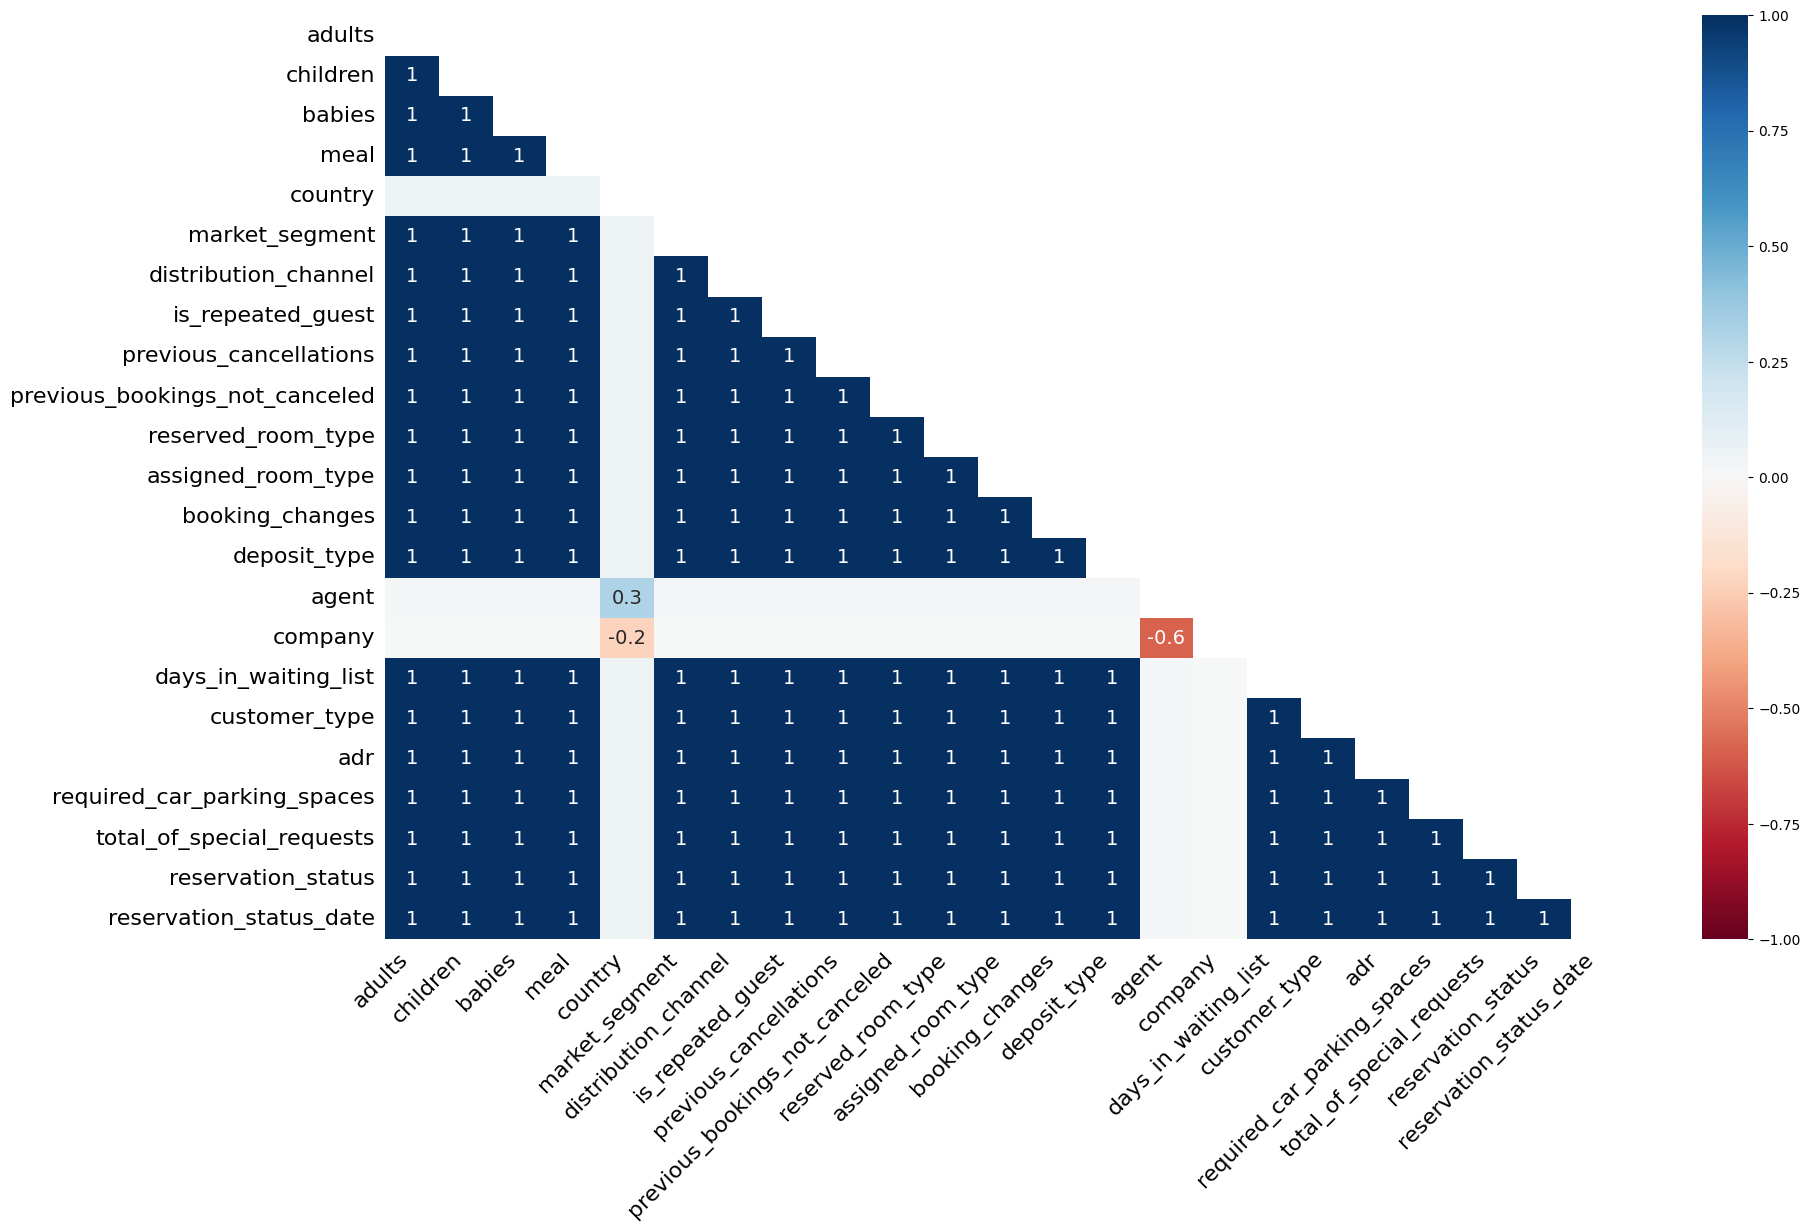

In [12]:
msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()


 Detect outliers in adr & lead_time

Outlier counts per column:
{'stays_in_weekend_nights': 66, 'stays_in_week_nights': 382, 'adults': 2227, 'children': 1502, 'babies': 159, 'is_repeated_guest': 2, 'previous_cancellations': 107, 'previous_bookings_not_canceled': 522, 'booking_changes': 1981, 'agent': 2136, 'company': 823, 'days_in_waiting_list': 66, 'adr': 104, 'required_car_parking_spaces': 793, 'total_of_special_requests': 280}


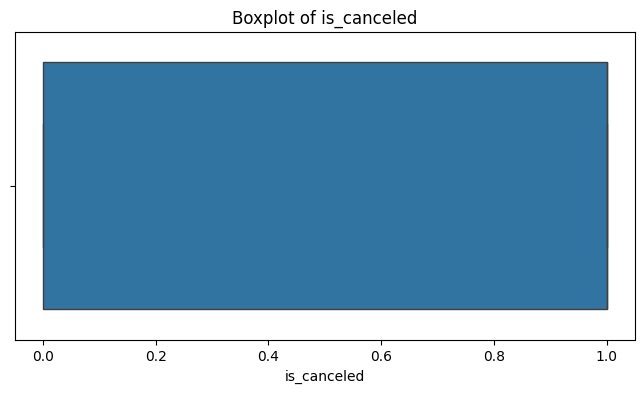

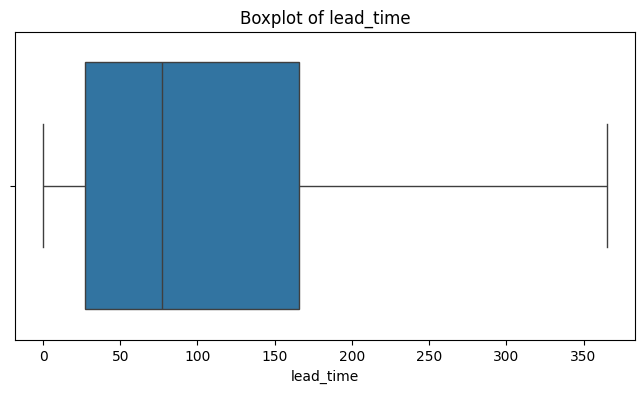

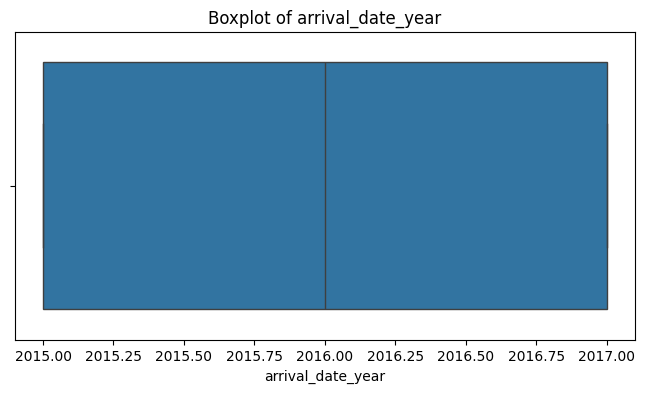

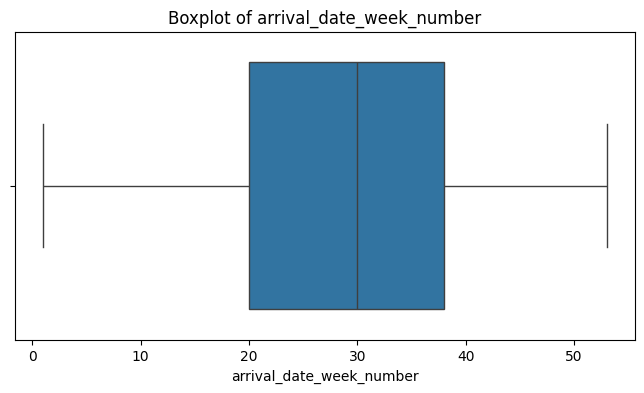

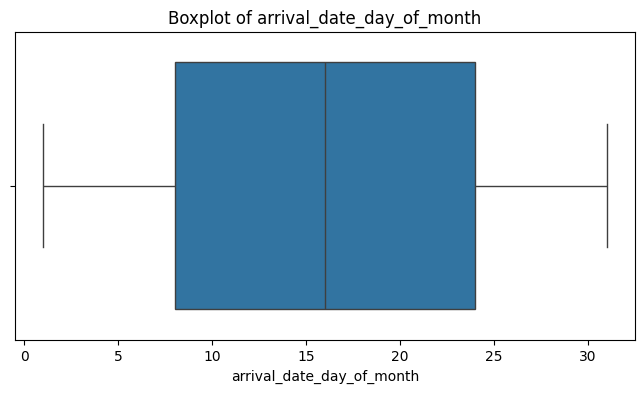

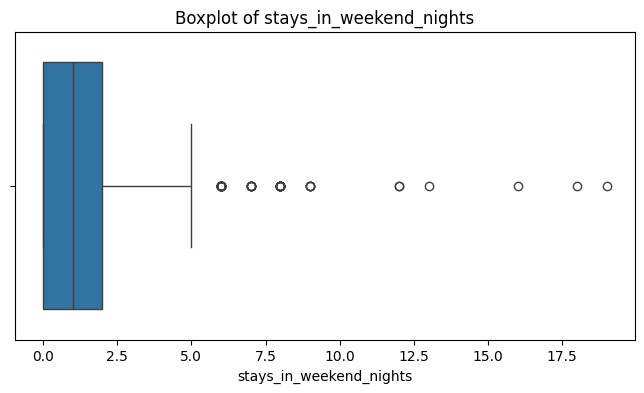

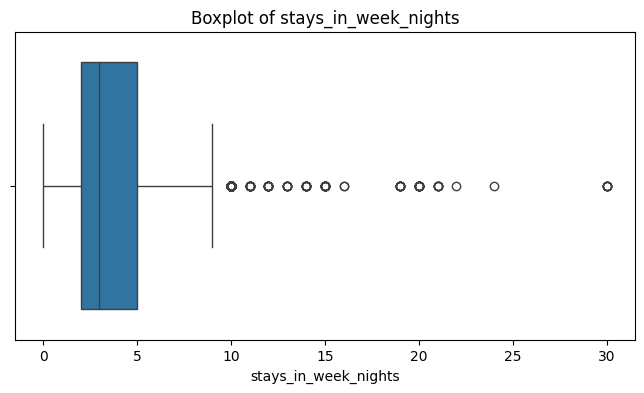

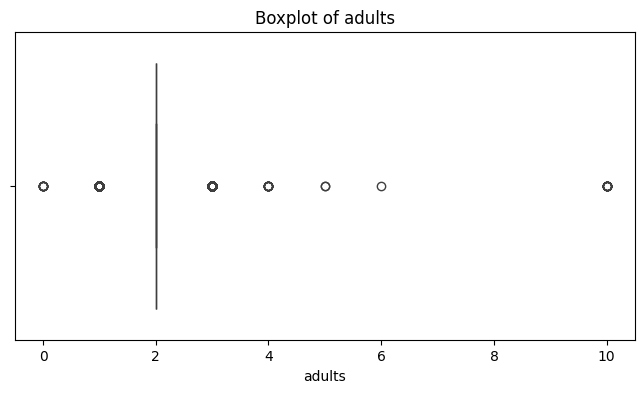

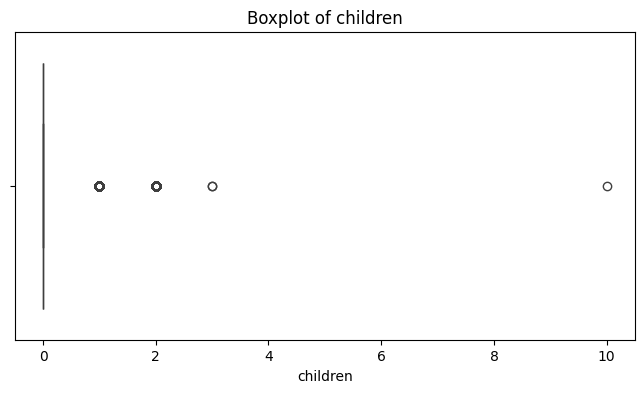

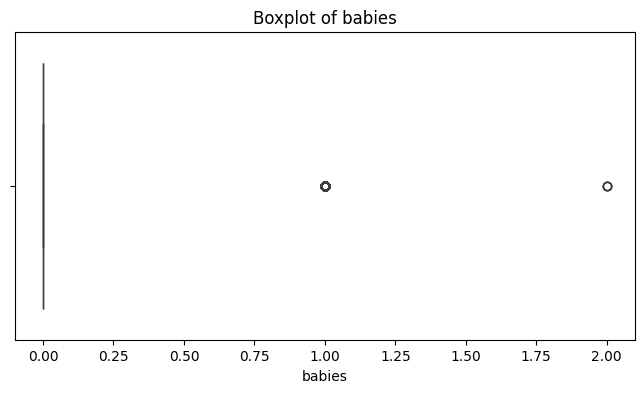

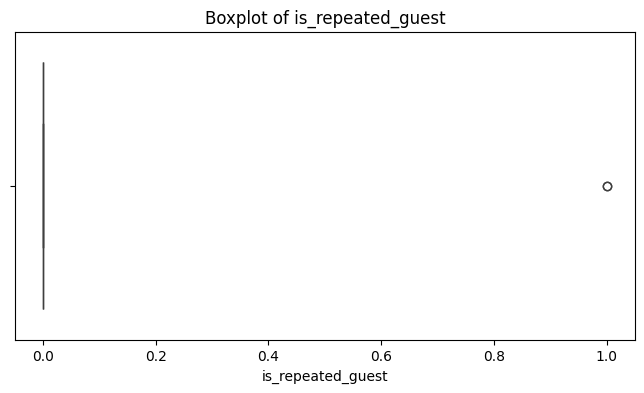

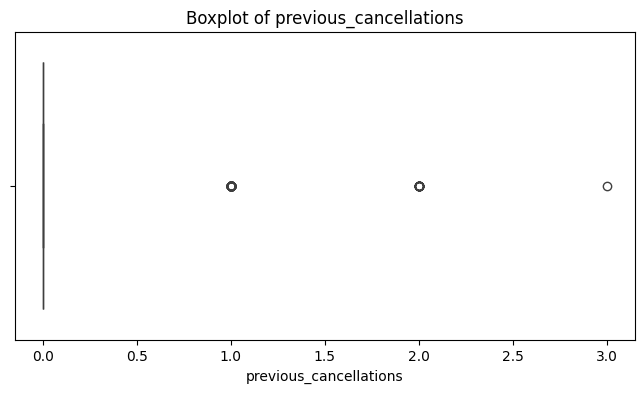

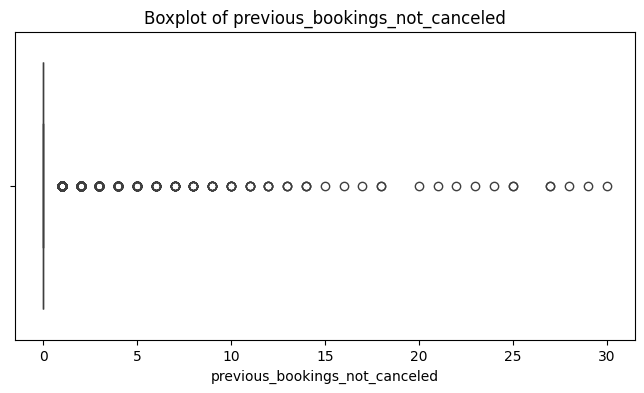

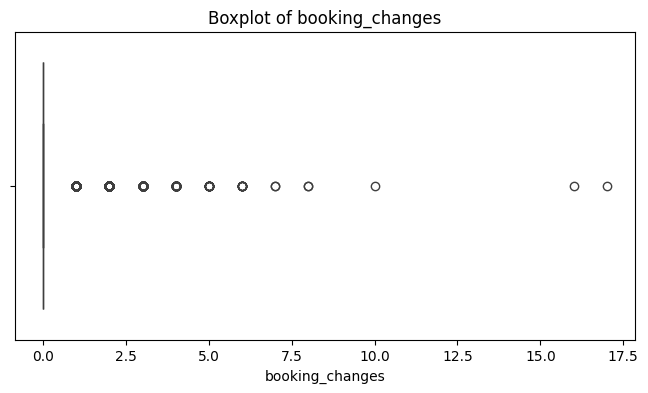

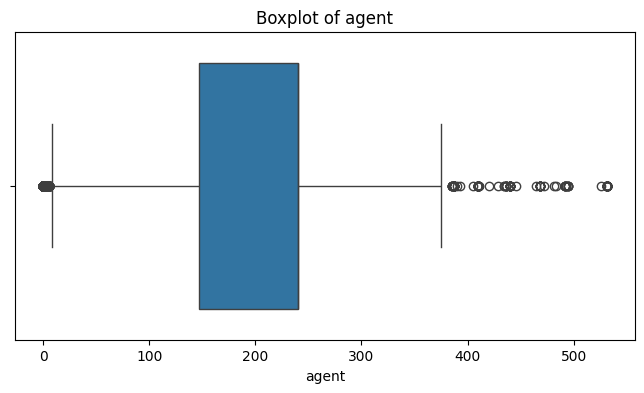

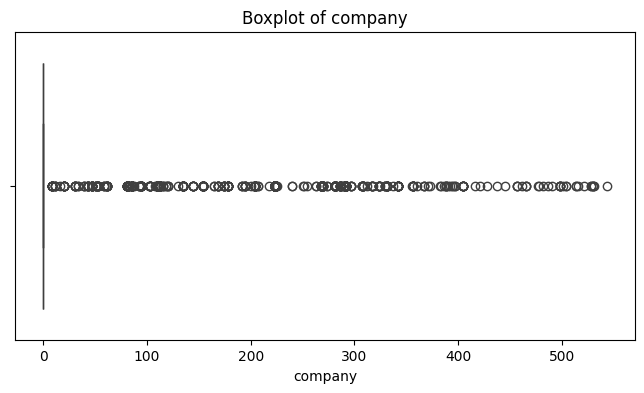

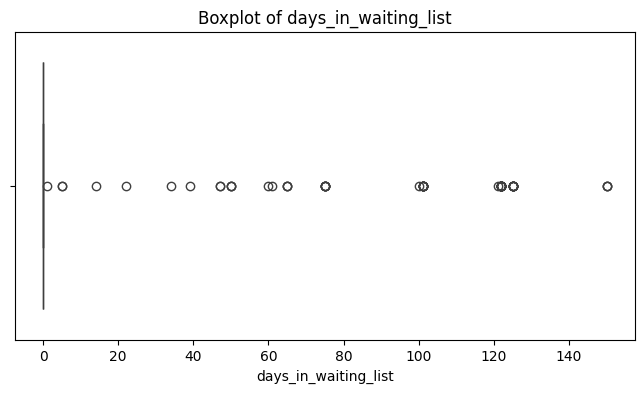

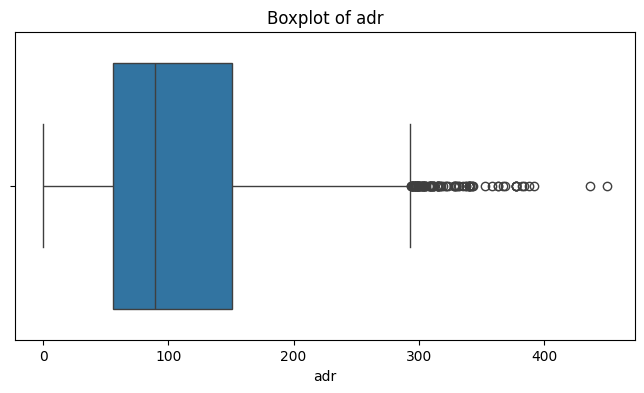

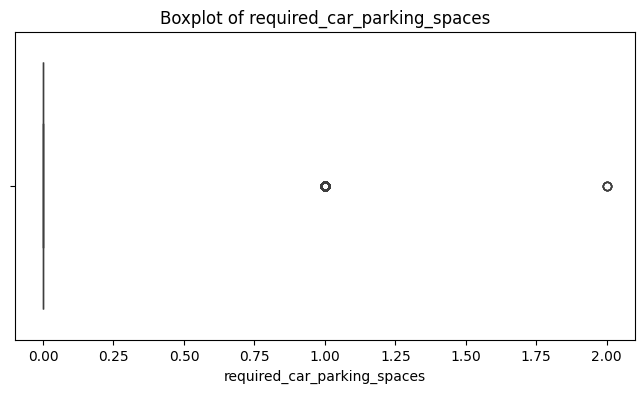

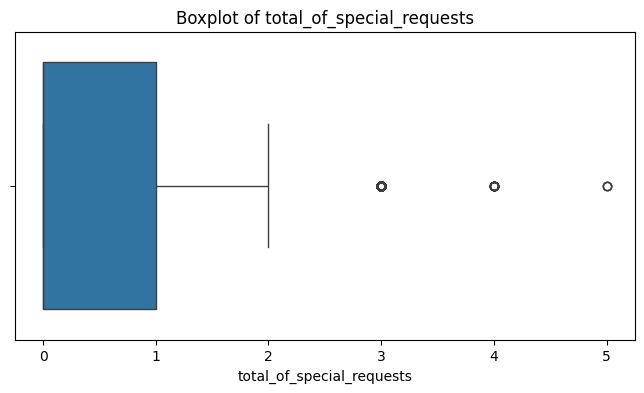

In [21]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

outlier_report = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    if len(outliers) > 0:
        outlier_report[col] = len(outliers)

# Show columns with outliers and their counts
print("Outlier counts per column:")
print(outlier_report)



for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

df_before = df.copy()


Document your findings




After performing Exploratory Data Analysis (EDA) on the hotel bookings dataset, we identified the following data quality issues:

1. **Missing Values**
   - `company`: a large number of missing values.
   - `agent`: a moderate number of missing values.
   - `country`: a small number of missing values.
   - Columns like `children`, `meal`, `market_segment`, and a few others contain only one missing value.

2. **Duplicates**
   - The dataset contains a noticeable number of duplicate rows.

3. **Outliers**
   Using the IQR method, several numerical columns were found to contain outliers:
   - `adr` (Average Daily Rate): extreme values above 1000.
   - `lead_time`: values exceeding 700 days.
   - `stays_in_weekend_nights` and `stays_in_week_nights`: unusually long stays (e.g., more than 30 nights).
   - `adults`: rare cases with very high values (above the normal range for bookings).
   - `children` and `babies`: very high counts in a few rows (unrealistic values).
   - `days_in_waiting_list`: extreme values (some customers waiting hundreds of days).
   - `previous_cancellations` and `previous_bookings_not_canceled`: extremely high values not typical for most bookings.

4. **Data Types**
   - `reservation_status_date` is currently stored as an object (string) and should be converted to a datetime type.

5.** Inconsistencies**
   - Some columns like `agent` and `company` are IDs rather than descriptive features.
   - The `country` column may require standardization to ensure consistency.

---


# Phase 2: Data Cleaning (The Core of the Project)

Handle Missing Values

In [15]:
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['children'] = df['children'].fillna(df['children'].median())

# For any other missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(0)
        else:
            df[col] = df[col].fillna('Unknown')


In [16]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Remove Duplicates

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Handle Outliers

In [22]:
# Cap extreme values in 'adr'
df.loc[df['adr'] > 1000, 'adr'] = 1000

# Lead time:
df.loc[df['lead_time'] > 365, 'lead_time'] = 365

# Stays:
df.loc[df['stays_in_weekend_nights'] > 30, 'stays_in_weekend_nights'] = 30
df.loc[df['stays_in_week_nights'] > 30, 'stays_in_week_nights'] = 30

# Adults:
df.loc[df['adults'] > 10, 'adults'] = 10

# Children & Babies:
df.loc[df['children'] > 10, 'children'] = 10
df.loc[df['babies'] > 10, 'babies'] = 10

# Days in waiting list:
df.loc[df['days_in_waiting_list'] > 365, 'days_in_waiting_list'] = 365

# Previous cancellations/bookings:
df.loc[df['previous_cancellations'] > 50, 'previous_cancellations'] = 50
df.loc[df['previous_bookings_not_canceled'] > 50, 'previous_bookings_not_canceled'] = 50


🔍 Outliers BEFORE capping (IQR):


,column,lower_iqr,upper_iqr,min_before,max_before,n_outliers_before
4,adults,2.0,2.0,0.0,10.0,2227
5,children,0.0,0.0,0.0,10.0,1502
9,previous_bookings_not_canceled,0.0,0.0,0.0,30.0,522
3,stays_in_week_nights,-2.5,9.5,0.0,30.0,382
6,babies,0.0,0.0,0.0,2.0,159
8,previous_cancellations,0.0,0.0,0.0,3.0,107
0,adr,-86.5,293.5,0.0,450.0,104
2,stays_in_weekend_nights,-3.0,5.0,0.0,19.0,66
7,days_in_waiting_list,0.0,0.0,0.0,150.0,66
1,lead_time,-181.5,374.5,0.0,365.0,0



🧾 How many values changed (capped)?


,0
adults,2227
children,1502
previous_bookings_not_canceled,522
stays_in_week_nights,382
babies,159
previous_cancellations,107
adr,104
stays_in_weekend_nights,66
days_in_waiting_list,66
lead_time,0


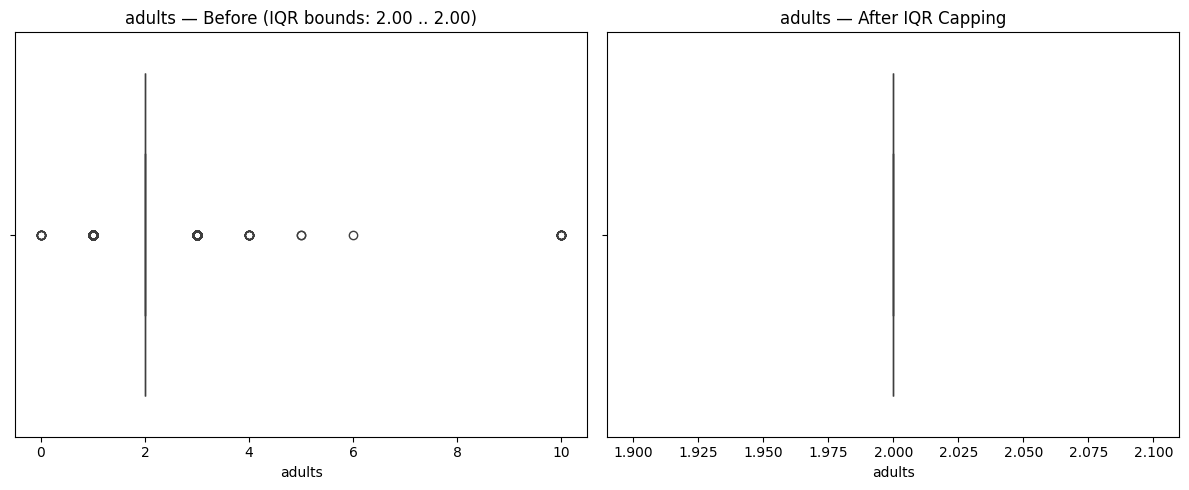

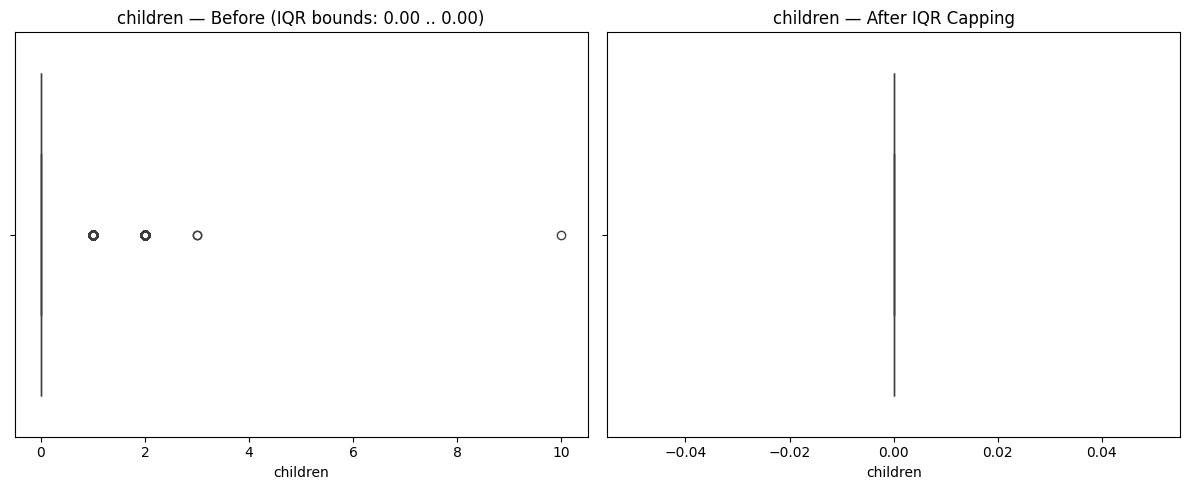

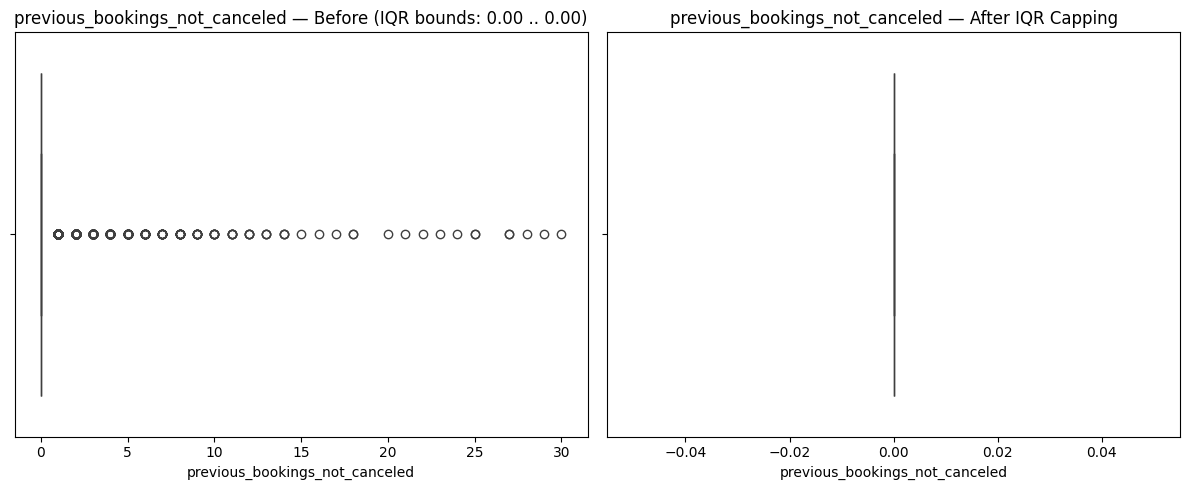

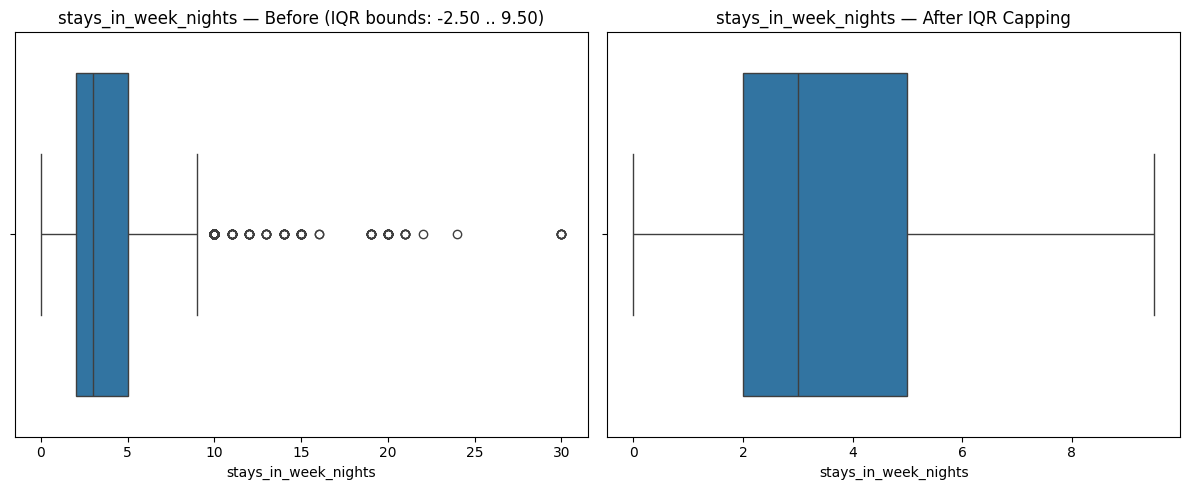

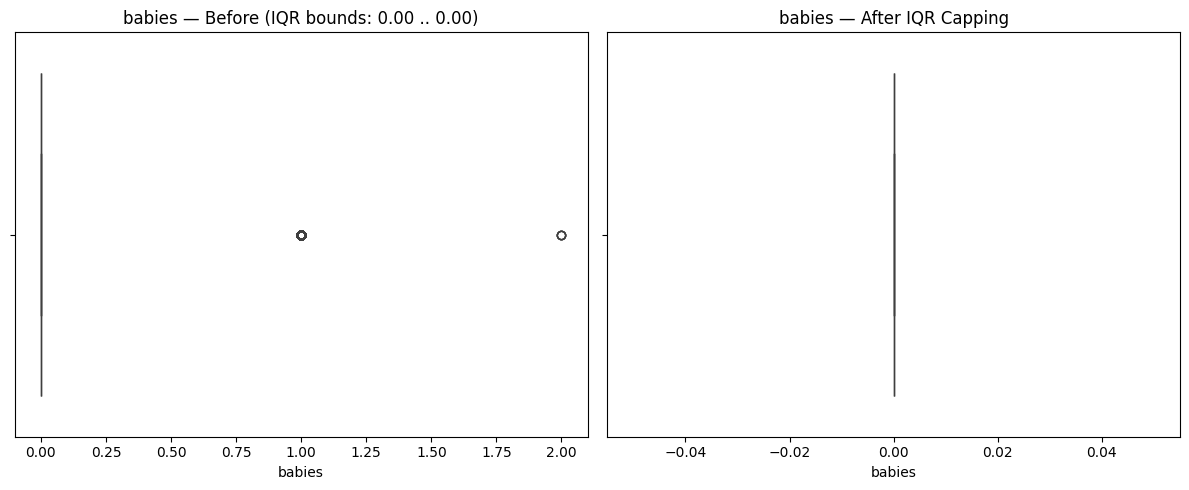

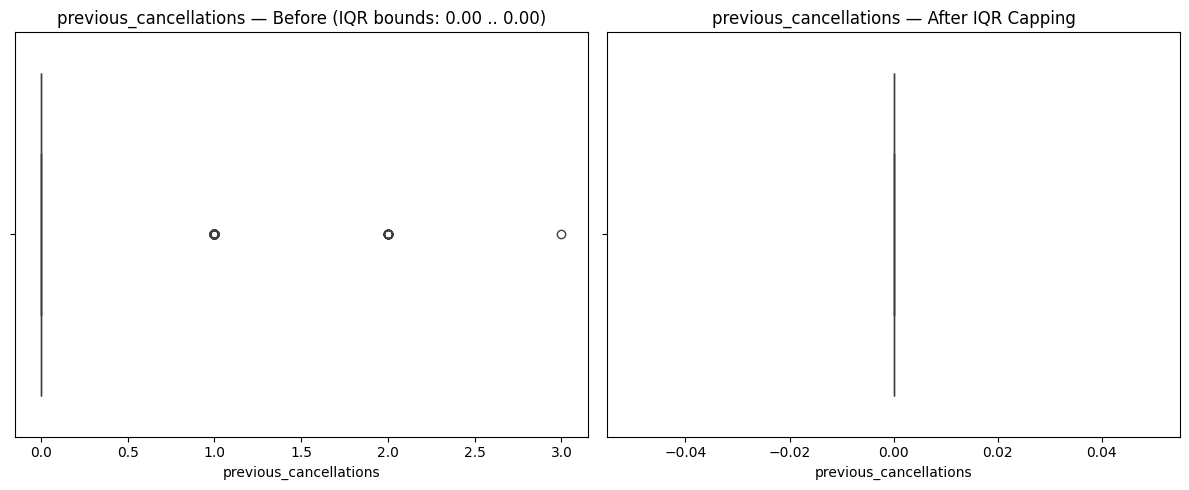

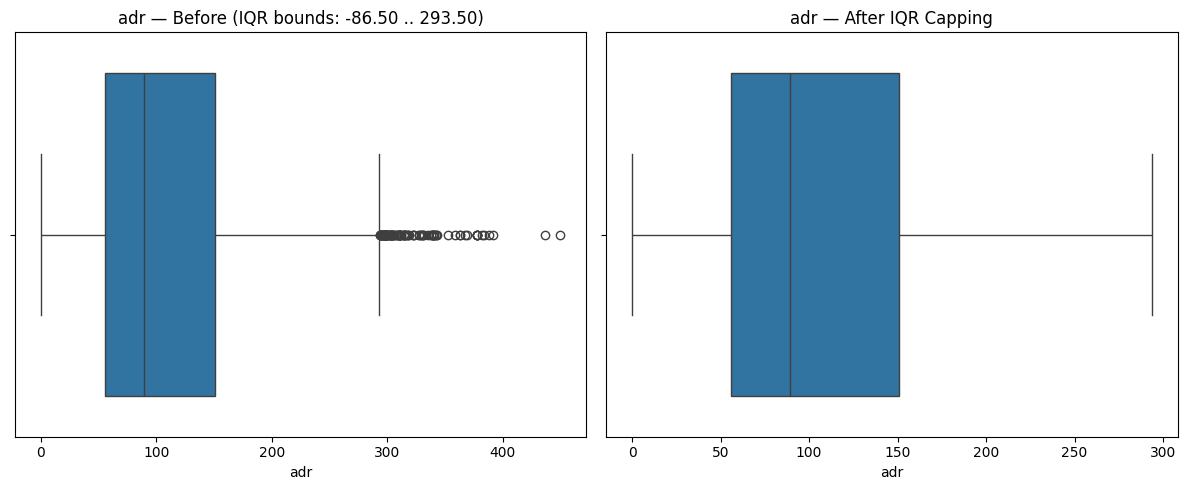

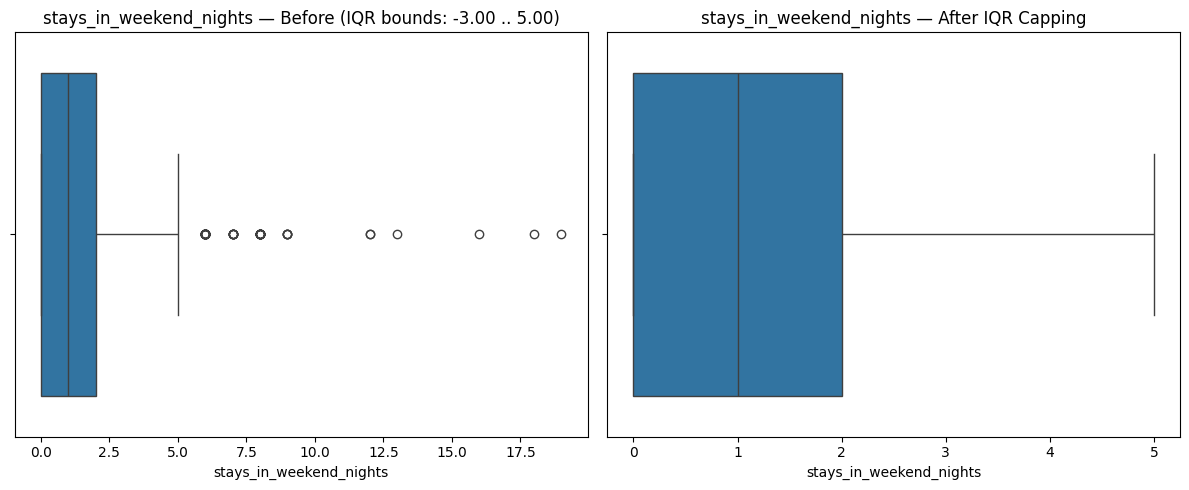

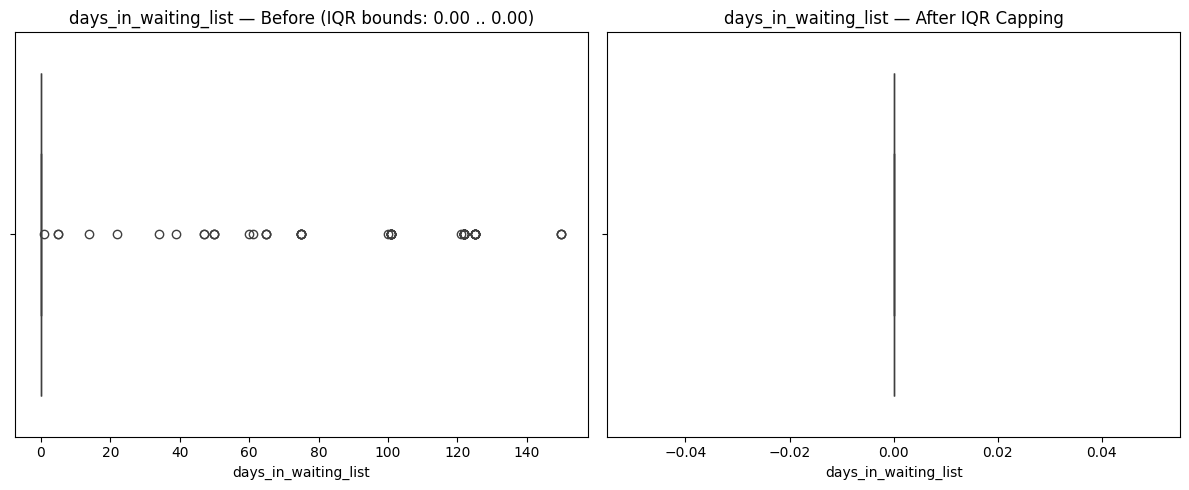

In [26]:
cols_capped = [
    'adr','lead_time','stays_in_weekend_nights','stays_in_week_nights',
    'adults','children','babies','days_in_waiting_list',
    'previous_cancellations','previous_bookings_not_canceled'
]

df_before = df.copy()

def iqr_bounds(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k*iqr
    upper = q3 + k*iqr
    return lower, upper

bounds = {}
report_before = []

for col in cols_capped:
    s = pd.to_numeric(df_before[col], errors='coerce')
    lo, up = iqr_bounds(s.dropna())
    bounds[col] = (lo, up)
    n_out = ((s < lo) | (s > up)).sum()
    report_before.append(
        dict(column=col, lower_iqr=lo, upper_iqr=up,
             min_before=s.min(), max_before=s.max(),
             n_outliers_before=int(n_out))
    )

report_before = pd.DataFrame(report_before).sort_values('n_outliers_before', ascending=False)
print(" Outliers BEFORE capping (IQR):")
display(report_before)

df_after = df_before.copy()
for col, (lo, up) in bounds.items():
    df_after[col] = pd.to_numeric(df_after[col], errors='coerce').clip(lower=lo, upper=up)

changed_counts = {}
for col in cols_capped:
    before = pd.to_numeric(df_before[col], errors='coerce')
    after  = pd.to_numeric(df_after[col],  errors='coerce')
    changed_counts[col] = int((before != after).sum())

changed_counts = pd.Series(changed_counts).sort_values(ascending=False)
print("\n How many values changed (capped)?")
display(changed_counts)

changed_cols = [c for c, n in changed_counts.items() if n > 0]

if len(changed_cols) == 0:
    print("\n No values exceeded IQR bounds — capping had no effect on this dataset.")
else:
    for col in changed_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12,5))
        sns.boxplot(x=df_before[col], ax=axes[0])
        axes[0].set_title(f"{col} — Before (IQR bounds: {bounds[col][0]:.2f} .. {bounds[col][1]:.2f})")
        sns.boxplot(x=df_after[col], ax=axes[1])
        axes[1].set_title(f"{col} — After IQR Capping")
        plt.tight_layout()
        plt.show()

df = df_after.copy()


Fix Data Types

In [25]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

print(" Phase 2: Data Cleaning Done!")

 Phase 2: Data Cleaning Done!


# Phase 3: Feature Engineering & Preprocessing

**Create New Features**

In [28]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = ((df['children'] > 0) | (df['babies'] > 0)).astype(int)  # 1 if family, 0 otherwise

print(" New features created: total_guests, total_nights, is_family")


 New features created: total_guests, total_nights, is_family


**Encode Categorical Variables**

In [29]:
low_cardinality = ['meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
                   'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

# High-cardinality → frequency encoding for country
country_freq = df['country'].value_counts(normalize=True)
df['country_freq'] = df['country'].map(country_freq)
df.drop('country', axis=1, inplace=True)

print(" One-Hot Encoding done for low-cardinality features.")
print(" Frequency encoding applied for 'country'.")

 One-Hot Encoding done for low-cardinality features.
 Frequency encoding applied for 'country'.


**CRITICAL STEP**

In [30]:
df.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True)
print(" Dropped leakage columns: reservation_status, reservation_status_date")


 Dropped leakage columns: reservation_status, reservation_status_date


**Final Preparation**

In [31]:
target = 'is_canceled'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Final dataset prepared and split:")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Final dataset prepared and split:
Training set: (9172, 57), Testing set: (2293, 57)
